## Exploratory Data Analysis with US Educational Finances

Link for dataset: https://www.kaggle.com/datasets/noriuk/us-educational-finances

This dataset contains financial data about the education system in the United States from 1992 to 2016. Including information on revenue and expenditure for states of the USA and years, as well as details on funding sources and expenditures by category.

We will do some Exploratory Data Analysis (EDA) to understand the data and, after that, we will use some machine learning models for regression analysis

In [1]:
# Just for install some libraries
#import sys
#!{sys.executable} -m pip install shap
#!{sys.executable} -m pip install numpy==1.21 -q

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio
from ydata_profiling import ProfileReport

%matplotlib inline

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
import shap

In [4]:
pio.renderers.default = "plotly_mimetype+notebook"

### Get and Inspect the Data

In [5]:
# Read the data
df = pd.read_csv("states.csv")

In [6]:
#  Seeing all the columns names:
for column_headers in df.columns:
    print(column_headers)

STATE
YEAR
ENROLL
TOTAL_REVENUE
FEDERAL_REVENUE
STATE_REVENUE
LOCAL_REVENUE
TOTAL_EXPENDITURE
INSTRUCTION_EXPENDITURE
SUPPORT_SERVICES_EXPENDITURE
OTHER_EXPENDITURE
CAPITAL_OUTLAY_EXPENDITURE


In [7]:
# Sample the data
df.sample(3)

STATE  YEAR     ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
280   Missouri  1997   899750.0        5550134           336452   
124   Michigan  1994  1601845.0       11762546           658039   
1208      Ohio  2015  1600222.0       24378660          1676820   

      STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
280         2695581        2518101            5527705   
124         3489815        7614692           12023935   
1208       10169760       12532080           22561728   

      INSTRUCTION_EXPENDITURE  SUPPORT_SERVICES_EXPENDITURE  \
280                   2906899                       1589440   
124                   5825127                       3912910   
1208                 11620080                       7324444   

      OTHER_EXPENDITURE  CAPITAL_OUTLAY_EXPENDITURE  
280            310482.0                      552305  
124            803226.0                      877390  
1208           922732.0                     1750785

In [8]:
# Seeing the data types
df.dtypes

STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                     int64
FEDERAL_REVENUE                   int64
STATE_REVENUE                     int64
LOCAL_REVENUE                     int64
TOTAL_EXPENDITURE                 int64
INSTRUCTION_EXPENDITURE           int64
SUPPORT_SERVICES_EXPENDITURE      int64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE        int64
dtype: object

Falar sobre os tipos dos dados

In [9]:
# Creating profile for automated report
profile = ProfileReport(df, title="US_Educationl_Finances_Report")

In [10]:
# Exporting to a file
profile.to_file("USA_Educational_Finances_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# Get an overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATE                         1275 non-null   object 
 1   YEAR                          1275 non-null   int64  
 2   ENROLL                        1224 non-null   float64
 3   TOTAL_REVENUE                 1275 non-null   int64  
 4   FEDERAL_REVENUE               1275 non-null   int64  
 5   STATE_REVENUE                 1275 non-null   int64  
 6   LOCAL_REVENUE                 1275 non-null   int64  
 7   TOTAL_EXPENDITURE             1275 non-null   int64  
 8   INSTRUCTION_EXPENDITURE       1275 non-null   int64  
 9   SUPPORT_SERVICES_EXPENDITURE  1275 non-null   int64  
 10  OTHER_EXPENDITURE             1224 non-null   float64
 11  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 119.7+ KB


As we can see from the "info" method, there are some features with missing values, namely <b>"ENROLL"</b> and <b>"OTHER_EXPEDINTURE"</b>.

In [12]:
# Checking the missing values
df.isnull().sum()

STATE                            0
YEAR                             0
ENROLL                          51
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               51
CAPITAL_OUTLAY_EXPENDITURE       0
dtype: int64

In [13]:
# Checking the missing values in percentage to see if it is "too much"
df.isna().mean().mul(100)

STATE                           0.0
YEAR                            0.0
ENROLL                          4.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               4.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
dtype: float64

So, approximately 4% of the <b>"ENROLL"</b> and <b>"OTHER_EXPEDINTURE"</b> data are missing

In [14]:
# Generating a descriptive statistics about the data
df.describe().T

count          mean           std       min  \
YEAR                          1275.0  2.004000e+03  7.213932e+00    1992.0   
ENROLL                        1224.0  9.175416e+05  1.066514e+06   43866.0   
TOTAL_REVENUE                 1275.0  9.102045e+06  1.175962e+07  465650.0   
FEDERAL_REVENUE               1275.0  7.677799e+05  1.146992e+06   31020.0   
STATE_REVENUE                 1275.0  4.223743e+06  5.549735e+06       0.0   
LOCAL_REVENUE                 1275.0  4.110522e+06  5.489562e+06   22093.0   
TOTAL_EXPENDITURE             1275.0  9.206242e+06  1.199279e+07  481665.0   
INSTRUCTION_EXPENDITURE       1275.0  4.768010e+06  6.300569e+06  265549.0   
SUPPORT_SERVICES_EXPENDITURE  1275.0  2.682587e+06  3.357214e+06  139963.0   
OTHER_EXPENDITURE             1224.0  4.299509e+05  5.347893e+05   11541.0   
CAPITAL_OUTLAY_EXPENDITURE    1275.0  9.034675e+05  1.329473e+06   12708.0   

                                     25%        50%          75%         max  
YEAR                             1998.00     2004.0      2010.00      2016.0  
ENROLL                         264514.50   649933.5   1010532.00   6307022.0  
TOTAL_REVENUE                 2189503.50  5085826.0  10845163.00  89217262.0  
FEDERAL_REVENUE                189957.50   403548.0    827932.00   9990221.0  
STATE_REVENUE                 1165776.00  2537754.0   5055547.50  50904567.0  
LOCAL_REVENUE                  715121.00  2058996.0   4755293.00  36105265.0  
TOTAL_EXPENDITURE             2170404.00  5242672.0  10744201.50  85320133.0  
INSTRUCTION_EXPENDITURE       1171336.50  2658253.0   5561959.00  43964520.0  
SUPPORT_SERVICES_EXPENDITURE   638076.00  1525471.0   3222924.50  26058021.0  
OTHER_EXPENDITURE              103449.25   271704.0    517222.25   3995951.0  
CAPITAL_OUTLAY_EXPENDITURE     181507.00   510428.0    966148.00  10223657.0

We can see that the <b>"ENROLL"</b> and <b>"OTHER_EXPENDITURE"</b> mean are far different from the median (50%).

<b>ENROLL</b> mean: 917541,6 / <b>ENROLL</b> median: 649933,5

<b>OTHER_EXPENDITURE</b> mean: 420050,9 / <b>OTHER_EXPENDITURE</b> median: 271704,0

So, the better approach is to fill the missing values with the median to avoid change too much the data behavior


In [15]:
# Filling the NAN values with the median of the respective columns
df = df.fillna(df.median())

In [16]:
df

STATE  YEAR     ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0           Alabama  1992   649933.5        2678885           304177   
1            Alaska  1992   649933.5        1049591           106780   
2           Arizona  1992   649933.5        3258079           297888   
3          Arkansas  1992   649933.5        1711959           178571   
4        California  1992   649933.5       26260025          2072470   
...             ...   ...        ...            ...              ...   
1270       Virginia  2016  1283493.0       16259274          1058146   
1271     Washington  2016  1083973.0       14964364          1097684   
1272  West Virginia  2016   276764.0        3391579           358068   
1273      Wisconsin  2016   857736.0       11697466           782610   
1274        Wyoming  2016    94511.0        2044669           123012   

      STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0           1659028         715680            2653798   
1            720711         222100             972488   
2           1369815        1590376            3401580   
3            958785         574603            1743022   
4          16546514        7641041           27138832   
...             ...            ...                ...   
1270        6297587        8903541           16497520   
1271        9211201        4655479           15253296   
1272        1863062        1170449            3366566   
1273        5986763        4928093           11787535   
1274        1175899         745758            2034229   

      INSTRUCTION_EXPENDITURE  SUPPORT_SERVICES_EXPENDITURE  \
0                     1481703                        735036   
1                      498362                        350902   
2                     1435908                       1007732   
3                      964323                        483488   
4                    14358922                       8520926   
...                       ...                           ...   
1270                  8944614                       5164699   
1271                  7087365                       4904575   
1272                  1804235                       1127255   
1273                  5760418                       3691439   
1274                   921494                        585700   

      OTHER_EXPENDITURE  CAPITAL_OUTLAY_EXPENDITURE  
0              271704.0                      174053  
1              271704.0                       37451  
2              271704.0                      609114  
3              271704.0                      145212  
4              271704.0                     2044688  
...                 ...                         ...  
1270           643506.0                     1161323  
1271           577606.0                     2204059  
1272           236487.0                      181392  
1273           508013.0                     1082849  
1274            53570.0                      454302  

[1275 rows x 12 columns]

In [17]:
df["YEAR"].unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016], dtype=int64)

We can see that our data goes from 1992 to 2016

In [18]:
# Now we apply the describe method again
df.describe().T

count          mean           std       min  \
YEAR                          1275.0  2.004000e+03  7.213932e+00    1992.0   
ENROLL                        1275.0  9.068372e+05  1.046265e+06   43866.0   
TOTAL_REVENUE                 1275.0  9.102045e+06  1.175962e+07  465650.0   
FEDERAL_REVENUE               1275.0  7.677799e+05  1.146992e+06   31020.0   
STATE_REVENUE                 1275.0  4.223743e+06  5.549735e+06       0.0   
LOCAL_REVENUE                 1275.0  4.110522e+06  5.489562e+06   22093.0   
TOTAL_EXPENDITURE             1275.0  9.206242e+06  1.199279e+07  481665.0   
INSTRUCTION_EXPENDITURE       1275.0  4.768010e+06  6.300569e+06  265549.0   
SUPPORT_SERVICES_EXPENDITURE  1275.0  2.682587e+06  3.357214e+06  139963.0   
OTHER_EXPENDITURE             1275.0  4.236211e+05  5.248933e+05   11541.0   
CAPITAL_OUTLAY_EXPENDITURE    1275.0  9.034675e+05  1.329473e+06   12708.0   

                                    25%        50%         75%         max  
YEAR                             1998.0     2004.0      2010.0      2016.0  
ENROLL                         280026.5   649933.5    996584.0   6307022.0  
TOTAL_REVENUE                 2189503.5  5085826.0  10845163.0  89217262.0  
FEDERAL_REVENUE                189957.5   403548.0    827932.0   9990221.0  
STATE_REVENUE                 1165776.0  2537754.0   5055547.5  50904567.0  
LOCAL_REVENUE                  715121.0  2058996.0   4755293.0  36105265.0  
TOTAL_EXPENDITURE             2170404.0  5242672.0  10744201.5  85320133.0  
INSTRUCTION_EXPENDITURE       1171336.5  2658253.0   5561959.0  43964520.0  
SUPPORT_SERVICES_EXPENDITURE   638076.0  1525471.0   3222924.5  26058021.0  
OTHER_EXPENDITURE              109261.5   271704.0    502545.5   3995951.0  
CAPITAL_OUTLAY_EXPENDITURE     181507.0   510428.0    966148.0  10223657.0

We can see that the overal behavior of the data do not have changed

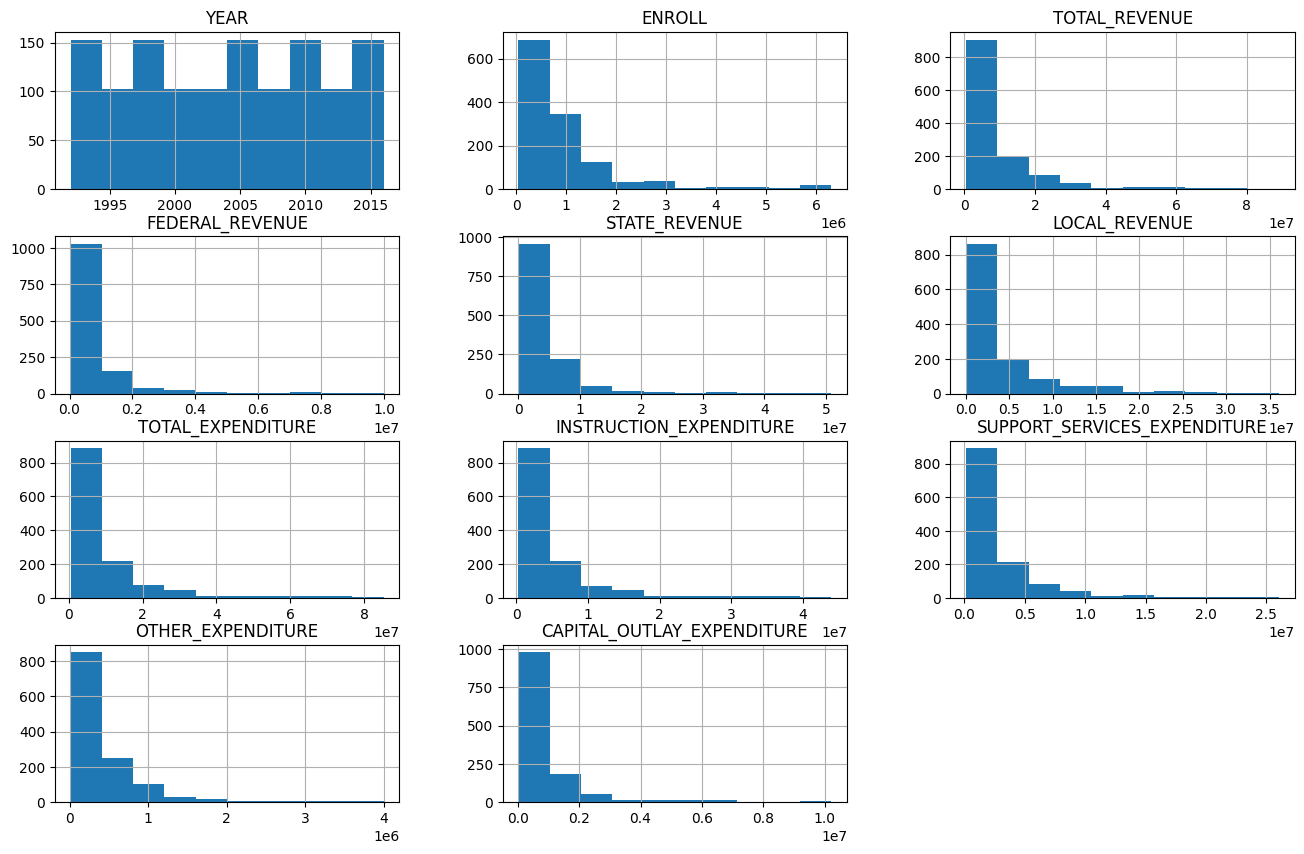

In [19]:
hist = df.hist(figsize=(16,10))

From the histogram we can see that some features have outliers like: <b>"ENROLL"</b>, <b>"FEDERAL REVENUE"</b>, <b>"STATE_REVENUE"</b>, <b>"LOCAL_REVENUE"</b>, <b>"SUPPORT_SERVICES_EXPEDINTURE"</b>.

This can indicates some uneven distributions of the educational capital

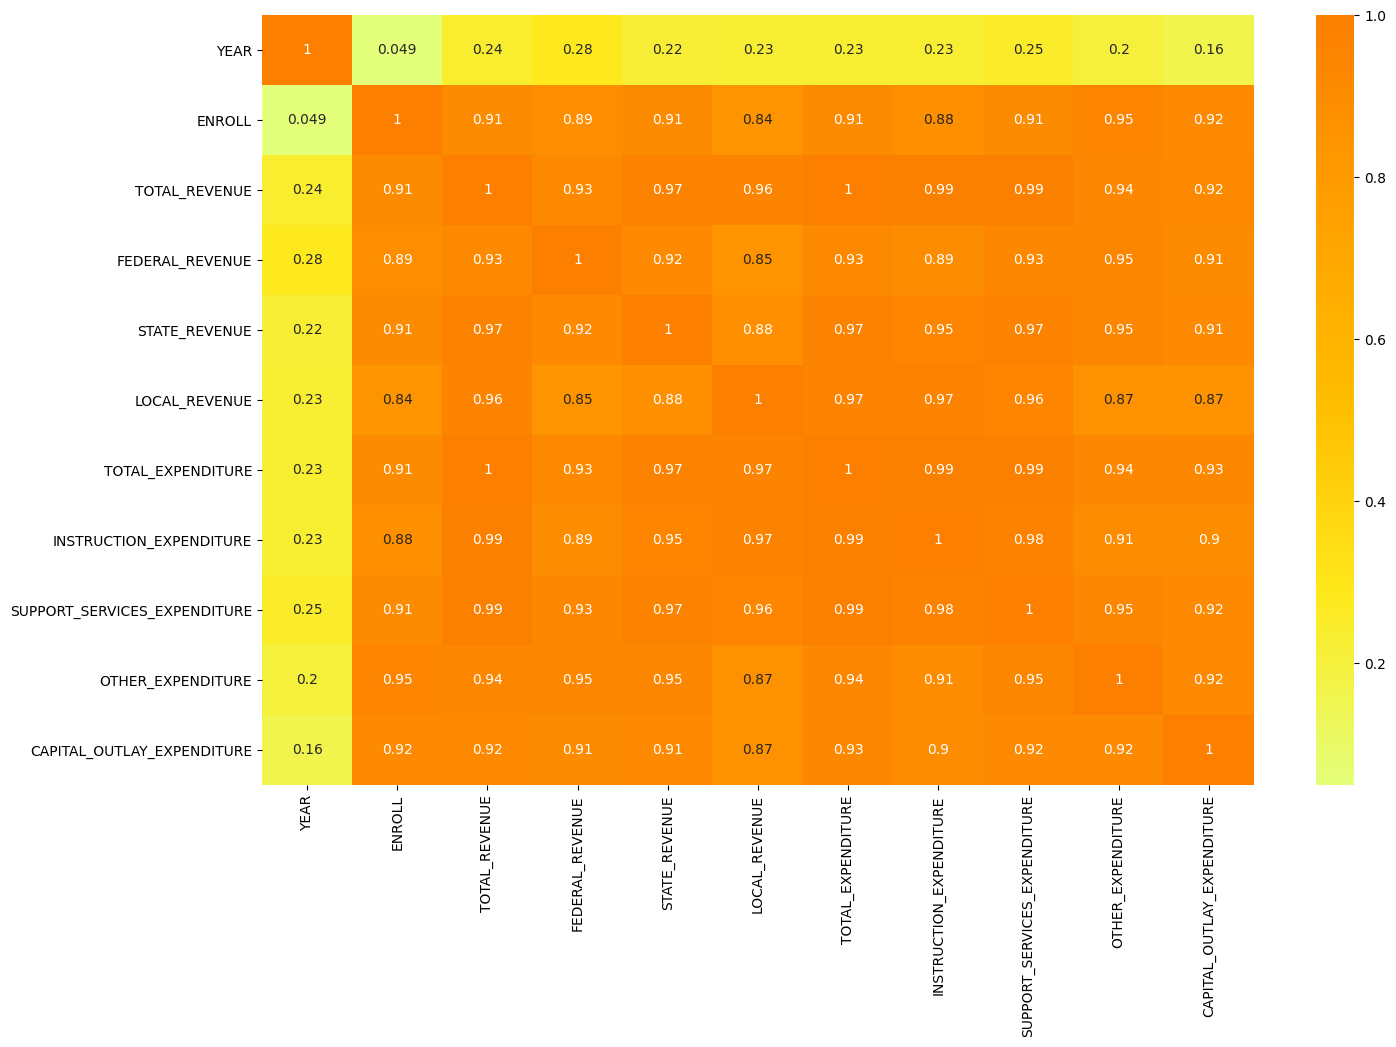

In [20]:
# Check the Pearson's correlation of the features
fig, ax = plt.subplots(figsize=(16,10)) 

heatmap = sns.heatmap(
    df.corr(),
    cmap="Wistia",
    annot=True,
)

corr_matrix = df.corr()

We can see that a lot of features have a strong positive correlation

Selecting <b>"ENROLL"</b> as a target feature, we have:

In [21]:
corr_matrix["ENROLL"].sort_values(ascending=False)

ENROLL                          1.000000
OTHER_EXPENDITURE               0.953119
CAPITAL_OUTLAY_EXPENDITURE      0.915697
SUPPORT_SERVICES_EXPENDITURE    0.913219
TOTAL_EXPENDITURE               0.911214
TOTAL_REVENUE                   0.910309
STATE_REVENUE                   0.910092
FEDERAL_REVENUE                 0.891933
INSTRUCTION_EXPENDITURE         0.877140
LOCAL_REVENUE                   0.843616
YEAR                            0.049440
Name: ENROLL, dtype: float64

Almost all features have a strong positive correlation with the <b>"ENROLL"</b> feature

Investigating the pairwise relationship between Revenue and Expenditures columns:

In [22]:
df_rev_exp = df[["TOTAL_REVENUE", "FEDERAL_REVENUE", 
                 "STATE_REVENUE", "LOCAL_REVENUE",
                 "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE"]]

In [23]:
df_rev_exp

TOTAL_REVENUE  FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  \
0           2678885           304177        1659028         715680   
1           1049591           106780         720711         222100   
2           3258079           297888        1369815        1590376   
3           1711959           178571         958785         574603   
4          26260025          2072470       16546514        7641041   
...             ...              ...            ...            ...   
1270       16259274          1058146        6297587        8903541   
1271       14964364          1097684        9211201        4655479   
1272        3391579           358068        1863062        1170449   
1273       11697466           782610        5986763        4928093   
1274        2044669           123012        1175899         745758   

      TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  
0               2653798                  1481703  
1                972488                   498362  
2               3401580                  1435908  
3               1743022                   964323  
4              27138832                 14358922  
...                 ...                      ...  
1270           16497520                  8944614  
1271           15253296                  7087365  
1272            3366566                  1804235  
1273           11787535                  5760418  
1274            2034229                   921494  

[1275 rows x 6 columns]

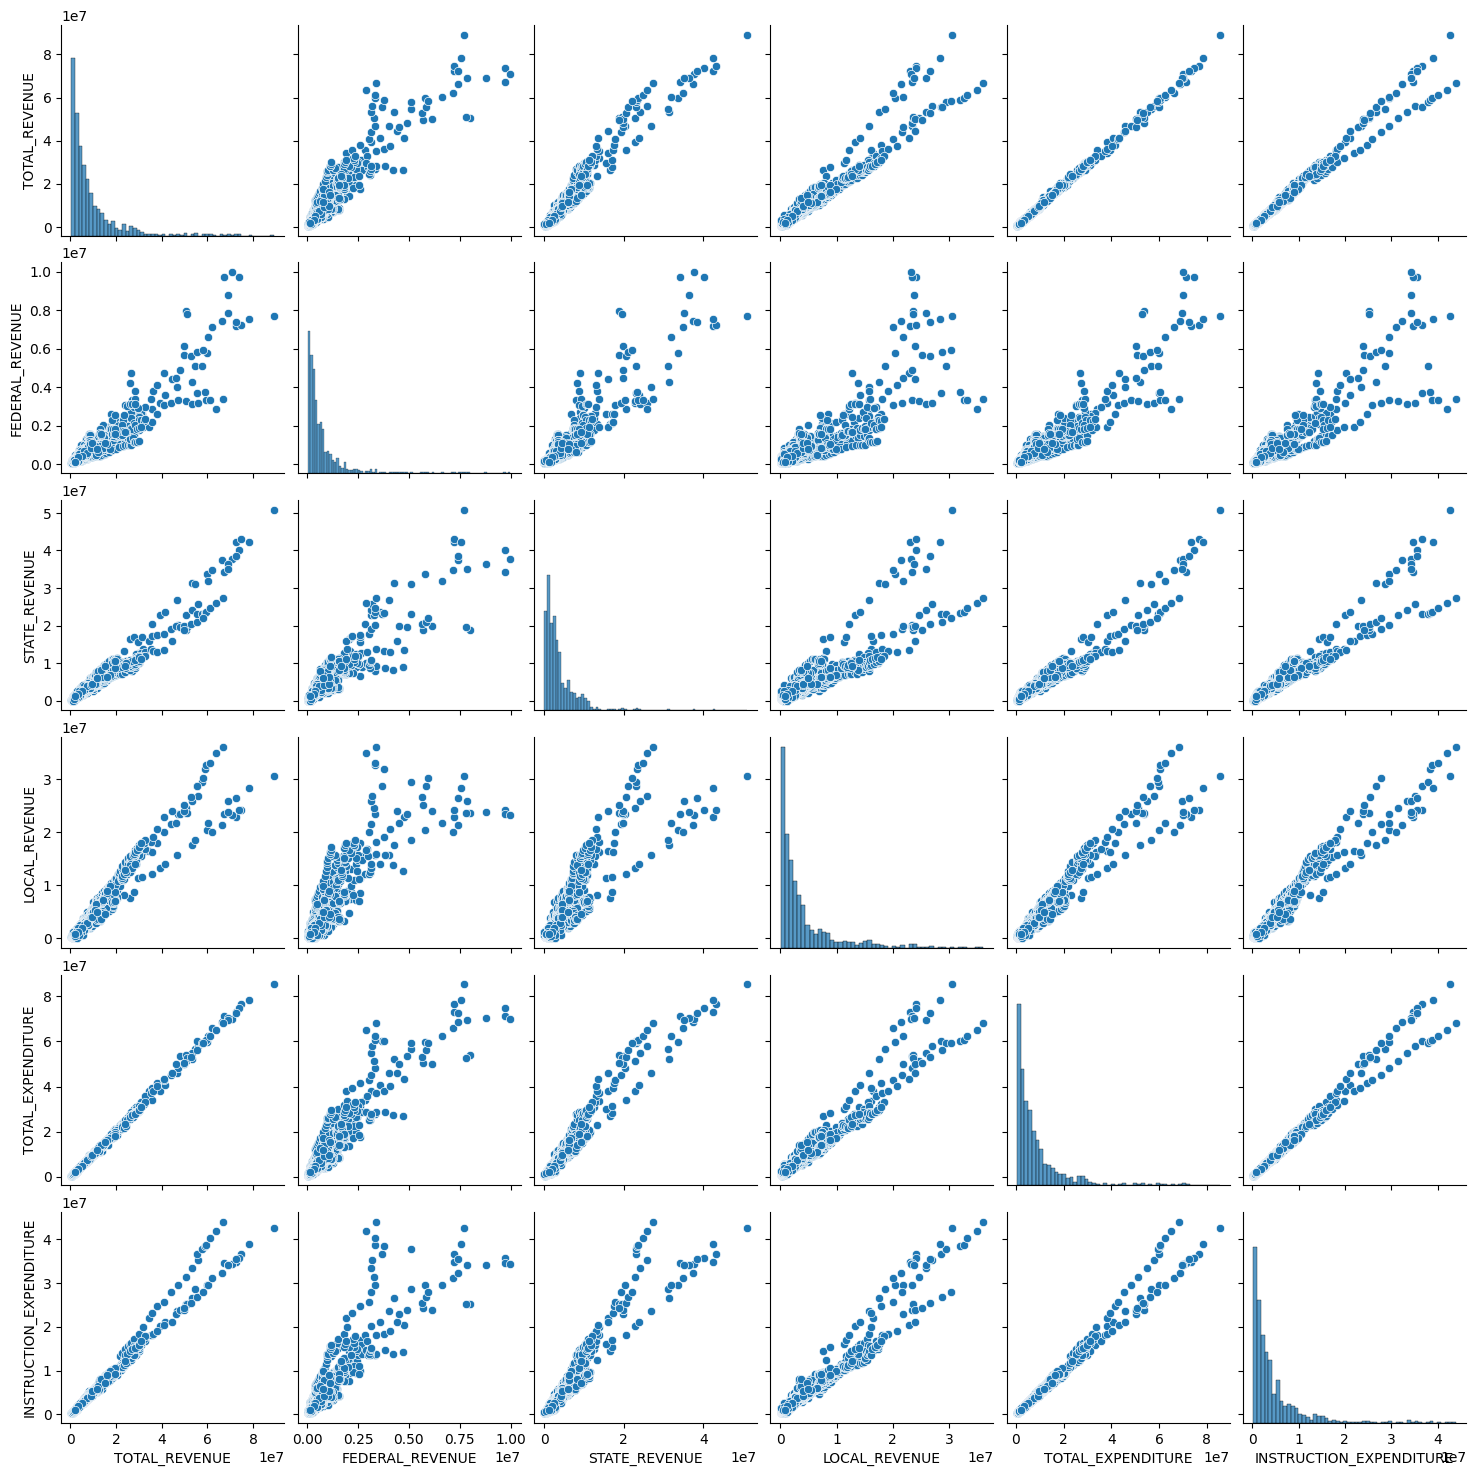

In [24]:
sns.pairplot(df_rev_exp)

There is a strong positive relationship between <b>"TOTAL_REVENUE"</b> and <b>"TOTAL_EXPENDITURE"</b> and between <b>"INSTRUCTION_EXPENDITURE"</b> and <b>"TOTAL_EXPENDITURE"</b>

This suggests that the total revenue and total expenditure are very connected and the relationship between <b>"TOTAL_EXPENDITURE"</b> and <b>"INSTRUCTION_EXPENDITURE"</b> shows that the greater the total expenditure, the greater the instruction expenditure. So, it's likely that a large part of expenditures are allocated at instruction

Now, we will create a function to do some plots

In [25]:
def plot_analysis(df, columns):
    df = df.set_index("YEAR").sort_index()
    fig = px.line(
        df,
        x=df.index,
        y=columns,
        template="simple_white",
        hover_name="TOTAL_REVENUE"
    )
    fig.update_layout(hovermode="x unified", margin=dict(l=0, r=0, t=50, b=5))
    return fig

In [26]:
# Creating dataframe for some plots
df_rev_exp_year = df[["YEAR", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
                 "STATE_REVENUE", "LOCAL_REVENUE",
                 "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE","ENROLL"]]

In [27]:
# "TOTAL_REVENUE" by "YEAR"
plot_analysis(df_rev_exp_year, "TOTAL_REVENUE")

From the plot we see that the overall behavior of the <b>"TOTAL_REVENUE"</b> is to increase with time.

However, between 2008 and 2014 there was a small drop and recovery in values

Now we will see the behavior of the <b>"FEDERAL_REVENUE"</b>, <b>"STATE_REVENUE"</b> and <b>"LOCAL_REVENUE"</b> with time

In [28]:
plot_analysis(df_rev_exp_year, columns=["FEDERAL_REVENUE", 
                 "STATE_REVENUE", "LOCAL_REVENUE"])

Then we infer that <b>"FEDERAL_REVENUE"</b>, <b>"STATE_REVENUE"</b> and <b>"LOCAL_REVENUE"</b> have the same behavior over years following the descending order of investments: STATE, LOCAL and FEDERAL

This show us that the STATES have the greater REVENUE

We also can plot <b>"TOTAL_EXPENDITURE"</b>, <b>"INSTRUCTION_EXPENDITURE"</b> over <b>"YEARS"</b>

In [29]:
plot_analysis(df_rev_exp_year, columns=["TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE"])

In [30]:
plot_analysis(df_rev_exp_year, columns=["TOTAL_EXPENDITURE", "ENROLL"])

Investigating some data through the <b>"STATES"</b> feature

In [31]:
state_total = df.groupby("STATE")["TOTAL_REVENUE","TOTAL_EXPENDITURE","ENROLL",
                                  "INSTRUCTION_EXPENDITURE"].sum().reset_index()
state_total

STATE  TOTAL_REVENUE  TOTAL_EXPENDITURE       ENROLL  \
0                Alabama      138646373          142256972   18327957.5   
1                 Alaska       43000991           45441660    3780244.5   
2                Arizona      164436053          163742728   21633663.5   
3               Arkansas       90285099           92693149   11495579.5   
4             California     1394979982         1406196283  143338166.5   
5               Colorado      161452999          166569410   18687559.5   
6            Connecticut      187059489          179946468   13205069.5   
7               Delaware       33924173           34371837    3377253.5   
8   District of Columbia       25519757           25429196    2137887.5   
9                Florida      521628284          532190131   60324507.5   
10               Georgia      335905812          333300109   36738645.5   
11                Hawaii       50140058           44393794    5051952.5   
12                 Idaho       41704167           41100008    6782013.5   
13              Illinois      531824812          536101621   49273998.5   
14               Indiana      245619721          235166627   24651490.5   
15                  Iowa      116894290          118352285   12499744.5   
16                Kansas      107225129          106137641   11995881.5   
17              Kentucky      132047864          133758568   16226245.5   
18             Louisiana      150855937          149160097   17849331.5   
19                 Maine       53221419           52762578    5410974.5   
20              Maryland      242685212          239353868   20856927.5   
21         Massachusetts      295823058          293501908   23014491.5   
22              Michigan      421927280          425656146   38917714.5   
23             Minnesota      213124292          221540838   20227347.5   
24           Mississippi       84387495           84628427   12374487.5   
25              Missouri      193647625          195774538   22145350.5   
26               Montana       32546831           32461018    4273040.5   
27              Nebraska       71402137           70687347    7660281.5   
28                Nevada       74688852           77966895    9414150.5   
29         New Hampshire       53501294           53645975    5302683.5   
30            New Jersey      503243390          501289806   30943447.5   
31            New Mexico       67627600           68142825    8403105.5   
32              New York     1059640622         1105029070   66606288.5   
33        North Carolina      262294930          262802568   32583079.5   
34          North Dakota       25161470           25614309    3200756.5   
35                  Ohio      453516109          444386156   42682232.5   
36              Oklahoma      112930113          112485091   15351271.5   
37                Oregon      124565689          128343341   13834247.5   
38          Pennsylvania      534941312          545344788   41853333.5   
39          Rhode Island       43450540           42434055    4162805.5   
40        South Carolina      149457685          153916973   17143138.5   
41          South Dakota       25094352           25363599    3697211.5   
42             Tennessee      162288907          169291989   23024527.5   
43                 Texas      921986390          958677247  104220013.5   
44                  Utah       79539776           80527105   12877316.5   
45               Vermont       36351491           36101265    2893132.5   
46              Virginia      280932008          286408962   28961111.5   
47            Washington      232397953          237046596   24906420.5   
48         West Virginia       66610475           66760807    7589012.5   
49             Wisconsin      223621171          224887219   21460511.5   
50               Wyoming       29348817           28816812    2849879.5   

    INSTRUCTION_EXPENDITURE  
0                  73430233  
1                  22306303  
2                  75612009 

To plot the "Choropleth map" we will need the state code of each state

In [32]:
state_code = ["AL","AK","AZ","AR","CA","CO","CT","DE","DC","FL",
             "GA","HI","ID","IL","IN","IA","KS","KY","LA","ME",
             "MD","MA","MI","MN","MS","MO","MT","NE","NV","NH",
             "NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI",
             "SC","SD","TN","TX","UT","VT","VA","WA","WV",
             "WI","WY"]

In [33]:
state_total["STATE_CODE"] = state_code
state_total

STATE  TOTAL_REVENUE  TOTAL_EXPENDITURE       ENROLL  \
0                Alabama      138646373          142256972   18327957.5   
1                 Alaska       43000991           45441660    3780244.5   
2                Arizona      164436053          163742728   21633663.5   
3               Arkansas       90285099           92693149   11495579.5   
4             California     1394979982         1406196283  143338166.5   
5               Colorado      161452999          166569410   18687559.5   
6            Connecticut      187059489          179946468   13205069.5   
7               Delaware       33924173           34371837    3377253.5   
8   District of Columbia       25519757           25429196    2137887.5   
9                Florida      521628284          532190131   60324507.5   
10               Georgia      335905812          333300109   36738645.5   
11                Hawaii       50140058           44393794    5051952.5   
12                 Idaho       41704167           41100008    6782013.5   
13              Illinois      531824812          536101621   49273998.5   
14               Indiana      245619721          235166627   24651490.5   
15                  Iowa      116894290          118352285   12499744.5   
16                Kansas      107225129          106137641   11995881.5   
17              Kentucky      132047864          133758568   16226245.5   
18             Louisiana      150855937          149160097   17849331.5   
19                 Maine       53221419           52762578    5410974.5   
20              Maryland      242685212          239353868   20856927.5   
21         Massachusetts      295823058          293501908   23014491.5   
22              Michigan      421927280          425656146   38917714.5   
23             Minnesota      213124292          221540838   20227347.5   
24           Mississippi       84387495           84628427   12374487.5   
25              Missouri      193647625          195774538   22145350.5   
26               Montana       32546831           32461018    4273040.5   
27              Nebraska       71402137           70687347    7660281.5   
28                Nevada       74688852           77966895    9414150.5   
29         New Hampshire       53501294           53645975    5302683.5   
30            New Jersey      503243390          501289806   30943447.5   
31            New Mexico       67627600           68142825    8403105.5   
32              New York     1059640622         1105029070   66606288.5   
33        North Carolina      262294930          262802568   32583079.5   
34          North Dakota       25161470           25614309    3200756.5   
35                  Ohio      453516109          444386156   42682232.5   
36              Oklahoma      112930113          112485091   15351271.5   
37                Oregon      124565689          128343341   13834247.5   
38          Pennsylvania      534941312          545344788   41853333.5   
39          Rhode Island       43450540           42434055    4162805.5   
40        South Carolina      149457685          153916973   17143138.5   
41          South Dakota       25094352           25363599    3697211.5   
42             Tennessee      162288907          169291989   23024527.5   
43                 Texas      921986390          958677247  104220013.5   
44                  Utah       79539776           80527105   12877316.5   
45               Vermont       36351491           36101265    2893132.5   
46              Virginia      280932008          286408962   28961111.5   
47            Washington      232397953          237046596   24906420.5   
48         West Virginia       66610475           66760807    7589012.5   
49             Wisconsin      223621171          224887219   21460511.5   
50               Wyoming       29348817           28816812    2849879.5   

    INSTRUCTION_EXPENDITURE STATE_CODE  
0                  73430233         AL  
1                  22306303         

In [34]:
fig = px.choropleth(state_total,
                    locations="STATE_CODE",
                    locationmode="USA-states",
                    scope="usa",
                    color="TOTAL_REVENUE",
                    color_continuous_scale="Viridis_r"
                   )

fig.update_layout(
        title_text="Total Revenue from 1992 to 2016",
        title_font_size=22,
        title_font_color="black",
        title_x=0.45)

fig.show()

In [35]:
fig = px.choropleth(state_total,
                    locations="STATE_CODE",
                    locationmode="USA-states",
                    scope="usa",
                    color="TOTAL_EXPENDITURE",
                    color_continuous_scale="Viridis_r"
                   )

fig.update_layout(
        title_text="Total Expenditure from 1992 to 2016",
        title_font_size=22,
        title_font_color="black",
        title_x=0.45)

fig.show()

In [36]:
fig = px.choropleth(state_total,
                    locations="STATE_CODE",
                    locationmode="USA-states",
                    scope="usa",
                    color="INSTRUCTION_EXPENDITURE",
                    color_continuous_scale="Viridis_r"
                   )

fig.update_layout(
        title_text="Total Instruction Expenditure from 1992 to 2016",
        title_font_size=22,
        title_font_color="black",
        title_x=0.45)

fig.show()

In [37]:
fig = px.choropleth(state_total,
                    locations="STATE_CODE",
                    locationmode="USA-states",
                    scope="usa",
                    color="ENROLL",
                    color_continuous_scale="Viridis_r"
                   )

fig.update_layout(
        title_text="Total Enroll from 1992 to 2016",
        title_font_size=22,
        title_font_color="black",
        title_x=0.45)

fig.show()

Analysing the <b>"TOTAL_REVENUE"</b>, <b>"TOTAL_EXPENDITURE"</b>, <b>"INSTRUCTION_EXPENDITURE"</b> with the <b>"ENROLL"</b> feature

In [38]:
state_total_ordered = state_total.sort_values(by="TOTAL_REVENUE", ascending=False)
state_total_ordered

STATE  TOTAL_REVENUE  TOTAL_EXPENDITURE       ENROLL  \
4             California     1394979982         1406196283  143338166.5   
32              New York     1059640622         1105029070   66606288.5   
43                 Texas      921986390          958677247  104220013.5   
38          Pennsylvania      534941312          545344788   41853333.5   
13              Illinois      531824812          536101621   49273998.5   
9                Florida      521628284          532190131   60324507.5   
30            New Jersey      503243390          501289806   30943447.5   
35                  Ohio      453516109          444386156   42682232.5   
22              Michigan      421927280          425656146   38917714.5   
10               Georgia      335905812          333300109   36738645.5   
21         Massachusetts      295823058          293501908   23014491.5   
46              Virginia      280932008          286408962   28961111.5   
33        North Carolina      262294930          262802568   32583079.5   
14               Indiana      245619721          235166627   24651490.5   
20              Maryland      242685212          239353868   20856927.5   
47            Washington      232397953          237046596   24906420.5   
49             Wisconsin      223621171          224887219   21460511.5   
23             Minnesota      213124292          221540838   20227347.5   
25              Missouri      193647625          195774538   22145350.5   
6            Connecticut      187059489          179946468   13205069.5   
2                Arizona      164436053          163742728   21633663.5   
42             Tennessee      162288907          169291989   23024527.5   
5               Colorado      161452999          166569410   18687559.5   
18             Louisiana      150855937          149160097   17849331.5   
40        South Carolina      149457685          153916973   17143138.5   
0                Alabama      138646373          142256972   18327957.5   
17              Kentucky      132047864          133758568   16226245.5   
37                Oregon      124565689          128343341   13834247.5   
15                  Iowa      116894290          118352285   12499744.5   
36              Oklahoma      112930113          112485091   15351271.5   
16                Kansas      107225129          106137641   11995881.5   
3               Arkansas       90285099           92693149   11495579.5   
24           Mississippi       84387495           84628427   12374487.5   
44                  Utah       79539776           80527105   12877316.5   
28                Nevada       74688852           77966895    9414150.5   
27              Nebraska       71402137           70687347    7660281.5   
31            New Mexico       67627600           68142825    8403105.5   
48         West Virginia       66610475           66760807    7589012.5   
29         New Hampshire       53501294           53645975    5302683.5   
19                 Maine       53221419           52762578    5410974.5   
11                Hawaii       50140058           44393794    5051952.5   
39          Rhode Island       43450540           42434055    4162805.5   
1                 Alaska       43000991           45441660    3780244.5   
12                 Idaho       41704167           41100008    6782013.5   
45               Vermont       36351491           36101265    2893132.5   
7               Delaware       33924173           34371837    3377253.5   
26               Montana       32546831           32461018    4273040.5   
50               Wyoming       29348817           28816812    2849879.5   
8   District of Columbia       25519757           25429196    2137887.5   
34          North Dakota       25161470           25614309    3200756.5   
41          South Dakota       25094352           25363599    3697211.5   

    INSTRUCTION_EXPENDITURE STATE_CODE  
4                 697074397         CA  
32                676591856         

Text(0.5, 1.0, 'INSTRUCTION_EXPENDITURE')

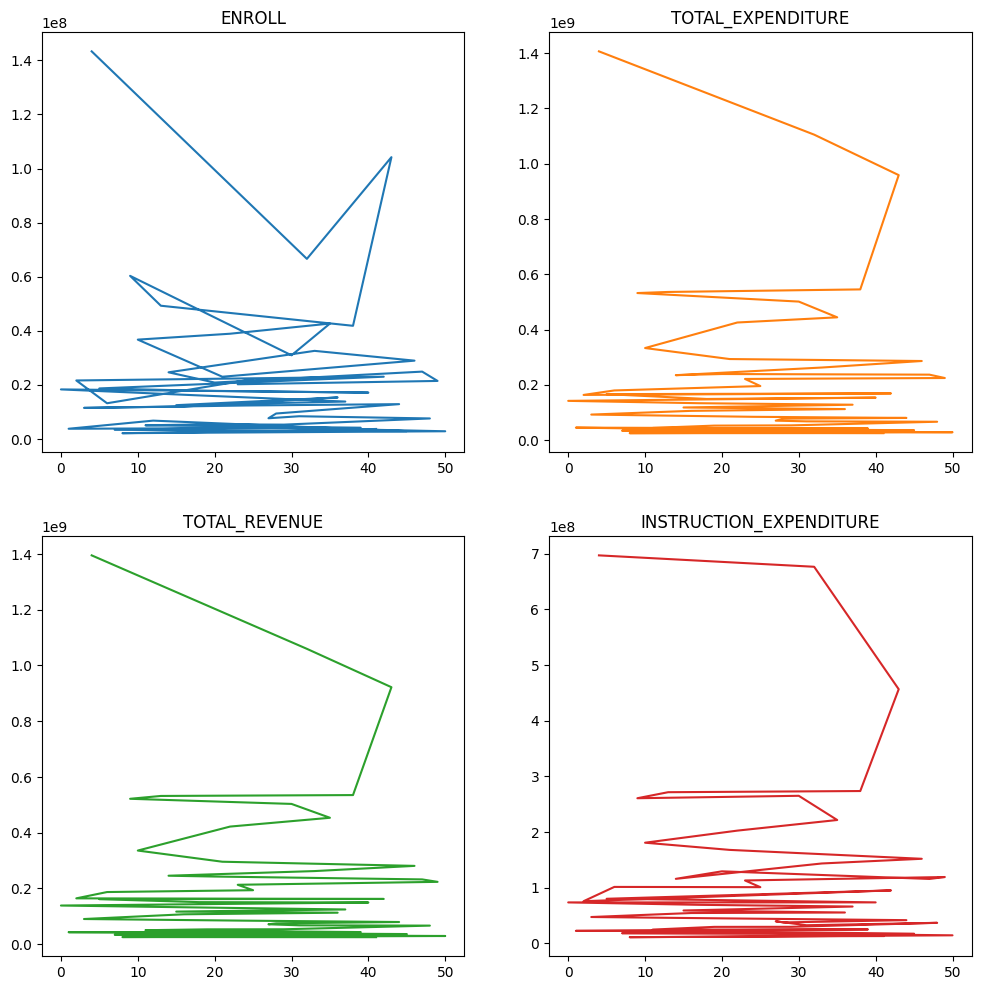

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
axs[0, 0].plot(state_total_ordered["ENROLL"])
axs[0, 0].set_title("ENROLL")
axs[0, 1].plot(state_total_ordered["TOTAL_EXPENDITURE"],"tab:orange")
axs[0, 1].set_title("TOTAL_EXPENDITURE")
axs[1, 0].plot(state_total_ordered["TOTAL_REVENUE"],"tab:green")
axs[1, 0].set_title("TOTAL_REVENUE")
axs[1, 1].plot(state_total_ordered["INSTRUCTION_EXPENDITURE"],"tab:red")
axs[1, 1].set_title("INSTRUCTION_EXPENDITURE")


From the plots we can see that the behavior of the features are similar. So, increasing <b>"TOTAL_REVENUE"</b>, <b>"TOTAL_EXPENDITURE"</b> and <b>"INSTRUCTION_EXPENDITURE"</b> tends to increase the <b>"ENROLL"</b> feature.

So, we can use this to predict the <b>"ENROLL"</b> behavior

### Training a Linear Regression Model

Our target value will be the <b>"ENROLL"</b> feature

Obtaining X and y arrays

In [40]:
df.head()

STATE  YEAR    ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  STATE_REVENUE  \
0     Alabama  1992  649933.5        2678885           304177        1659028   
1      Alaska  1992  649933.5        1049591           106780         720711   
2     Arizona  1992  649933.5        3258079           297888        1369815   
3    Arkansas  1992  649933.5        1711959           178571         958785   
4  California  1992  649933.5       26260025          2072470       16546514   

   LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0         715680            2653798                  1481703   
1         222100             972488                   498362   
2        1590376            3401580                  1435908   
3         574603            1743022                   964323   
4        7641041           27138832                 14358922   

   SUPPORT_SERVICES_EXPENDITURE  OTHER_EXPENDITURE  CAPITAL_OUTLAY_EXPENDITURE  
0                        735036           271704.0                      174053  
1                        350902           271704.0                       37451  
2                       1007732           271704.0                      609114  
3                        483488           271704.0                      145212  
4                       8520926           271704.0                     2044688

In [41]:
X = df[["TOTAL_REVENUE","FEDERAL_REVENUE","STATE_REVENUE",
        "LOCAL_REVENUE","TOTAL_EXPENDITURE",
        "INSTRUCTION_EXPENDITURE","SUPPORT_SERVICES_EXPENDITURE",
       "CAPITAL_OUTLAY_EXPENDITURE"]]

y= df["ENROLL"]

### Train-Test Split

Now let's split the data into a training set and a testing set. We will <b>train our model on the training set</b> and then <b>use the test set to evaluate the model.</b>

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.33,
                                                   random_state=42)

### Creating and Training the Model

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

Let's evaluate the model by checking out it's coefficients

In [47]:
# Print the intercept
print(lm.intercept_)

171625.33040743403


In [48]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,
                        columns=["Coefficient"])
coeff_df

Coefficient
TOTAL_REVENUE                   -0.014658
FEDERAL_REVENUE                 -0.017689
STATE_REVENUE                    0.025740
LOCAL_REVENUE                   -0.022709
TOTAL_EXPENDITURE                0.115448
INSTRUCTION_EXPENDITURE         -0.139757
SUPPORT_SERVICES_EXPENDITURE     0.083729
CAPITAL_OUTLAY_EXPENDITURE       0.268322

### Interpreting the coefficients

We can see that the a increase in the features <b>"TOTAL_REVENUE"</b>, <b>"FEDERAL_REVENUE"</b>, <b>"LOCAL_REVENUE"</b> and <b>"INSTRUCTION_EXPENDITURE"</b> causes a decrease in the <b>"ENROLL"</b> target.

This is counerintuitive as one would expect an increase in the "ENROLL feature. Based on this, we can question whether instruction expenditure is being carried out in an incisive way in education and wheter the revenue is being converted into effective education actions

On the other hand, a unit increase in the <b>"CAPITAL_OUTLAY_EXPENDITURE"</b> causes an increase in the <b>"ENROLL"</b>, this show us an effective way to increase our target feature

### Predictions from our Model

In [49]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Test X Predictions Scatter Plot - Linear Regression')

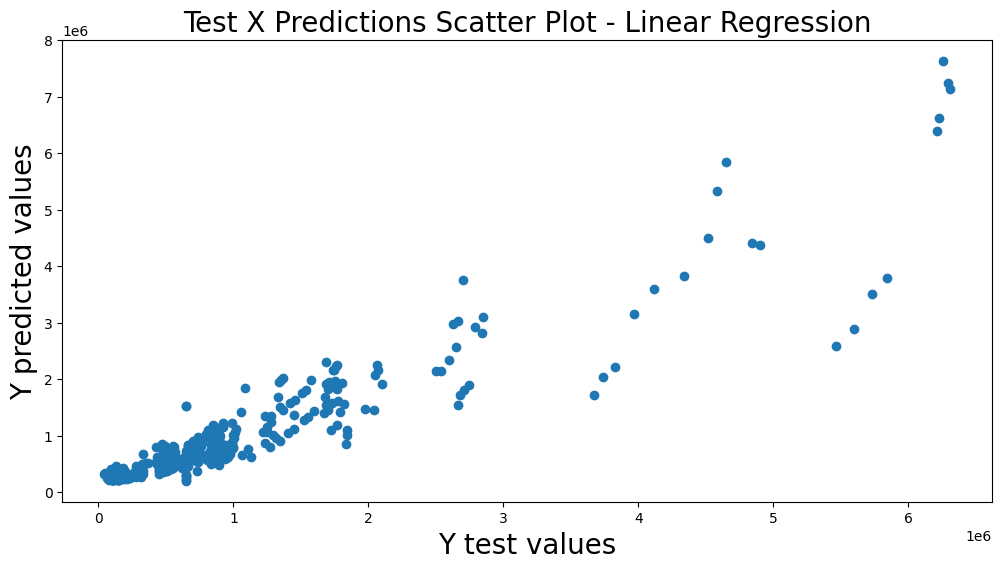

In [50]:
fig, ax = plt.subplots(figsize=(12,6)) 
plt.scatter(y_test, predictions)
plt.xlabel("Y test values", fontsize=20)
plt.ylabel("Y predicted values", fontsize=20)
plt.title("Test X Predictions Scatter Plot - Linear Regression", fontsize=20)

Text(0.5, 1.0, 'Residual Histogram - Linear Regression')

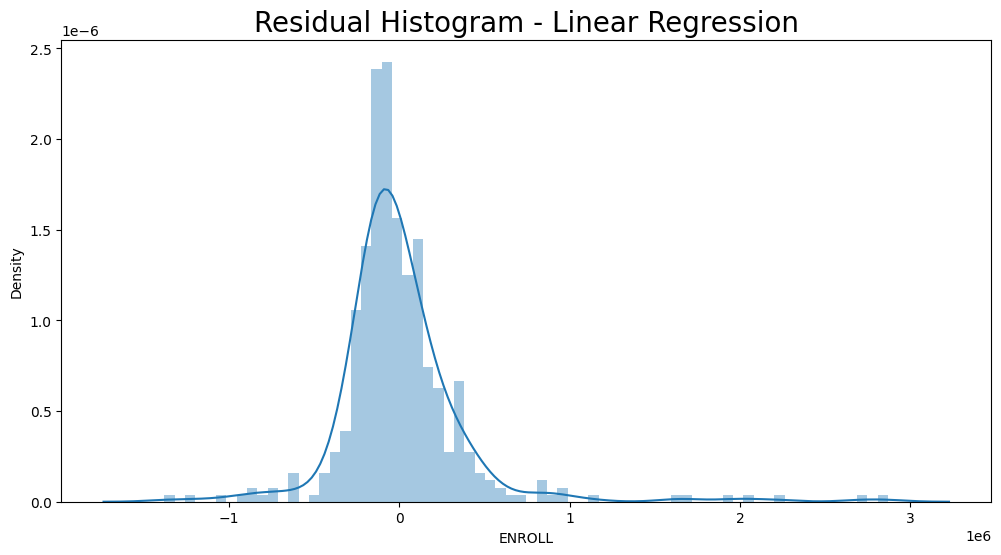

In [51]:
fig, ax = plt.subplots(figsize=(12,6)) 
sns.distplot((y_test-predictions),bins=70)
plt.title("Residual Histogram - Linear Regression", fontsize=20)

### Regression Evaluation Metrics

In [52]:
from sklearn import metrics

In [53]:
print('Metrics for Linear Regression:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2_score', metrics.r2_score(y_test, predictions))


Metrics for Linear Regression:
MAE: 230744.320744479
MSE: 158649676012.92545
RMSE: 398308.51862962387
r2_score 0.8719501838436295


The $R^{2}$ value is 0,87. So, approximately 87% of the data variance is captured/explained by our model

Now let's test other regression models to have a comparison

### Decision Tree Regressor

It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is developed

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
tree_reg = DecisionTreeRegressor()

In [56]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [57]:
tree_reg_predictions = tree_reg.predict(X_test)

In [58]:
print('Metrics for Decision Tree Regressor:')
print('MAE:', metrics.mean_absolute_error(y_test, tree_reg_predictions))
print('MSE:', metrics.mean_squared_error(y_test, tree_reg_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tree_reg_predictions)))
print('r2_score', metrics.r2_score(y_test, tree_reg_predictions))


Metrics for Decision Tree Regressor:
MAE: 180461.88242280285
MSE: 146134708027.66925
RMSE: 382275.6963601914
r2_score 0.8820513034298073


Text(0.5, 1.0, 'Test X Predictions Scatter Plot - Decision Tree Regressor')

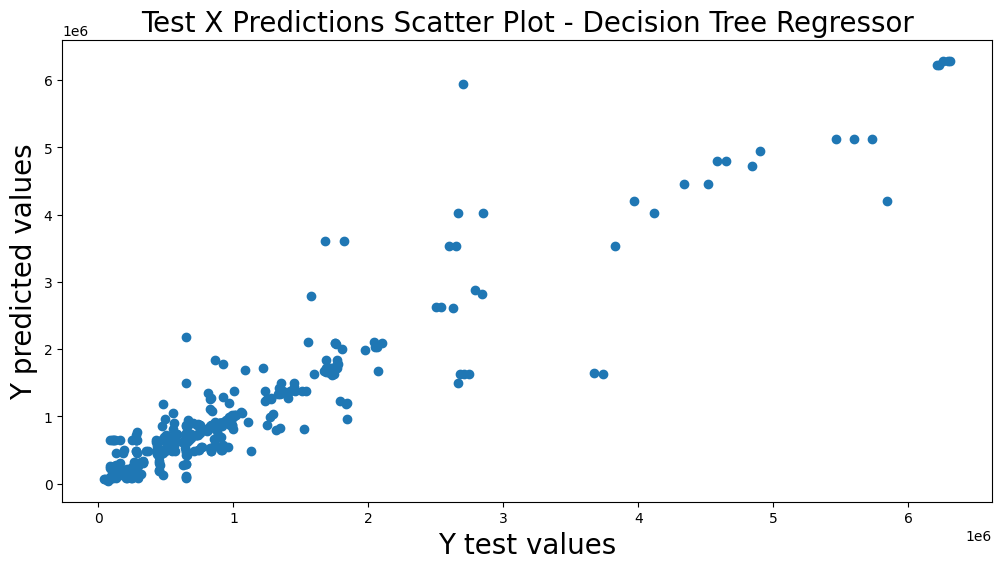

In [59]:
fig, ax = plt.subplots(figsize=(12,6)) 
plt.scatter(y_test, tree_reg_predictions)
plt.xlabel("Y test values", fontsize=20)
plt.ylabel("Y predicted values", fontsize=20)
plt.title("Test X Predictions Scatter Plot - Decision Tree Regressor", fontsize=20)

Text(0.5, 1.0, 'Residual Histogram - Decision Tree Regressor')

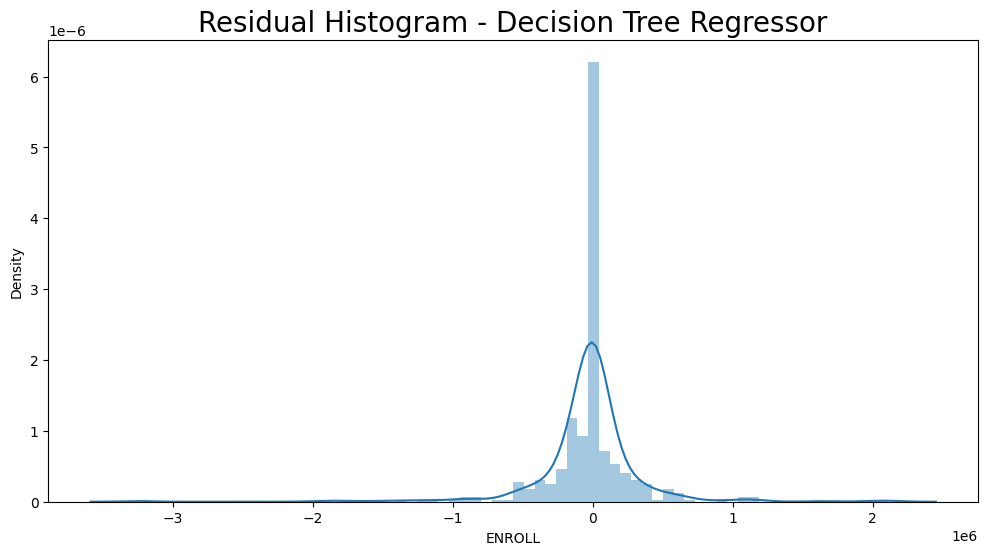

In [60]:
fig, ax = plt.subplots(figsize=(12,6)) 
sns.distplot((y_test-tree_reg_predictions),bins=70)
plt.title("Residual Histogram - Decision Tree Regressor", fontsize=20)

Finally, we will use the "Random Forest Regressor" model

### Random Forest Regressor

The "Random Forest Regressor" works by training many decision trees on random subsets of features and averaging their predictions to avoid overfitting

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
forest_reg = RandomForestRegressor()

In [63]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [64]:
random_forest_predictions = forest_reg.predict(X_test)

In [65]:
print('Metrics for Random Forest Regressor:')
print('MAE:', metrics.mean_absolute_error(y_test, random_forest_predictions))
print('MSE:', metrics.mean_squared_error(y_test, random_forest_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, random_forest_predictions)))
print('r2_score', metrics.r2_score(y_test, random_forest_predictions))


Metrics for Random Forest Regressor:
MAE: 154112.81633016627
MSE: 93458226737.24664
RMSE: 305709.38280865154
r2_score 0.9245677075884491


Text(0.5, 1.0, 'Test X Predictions Scatter Plot - Random Forest Regressor')

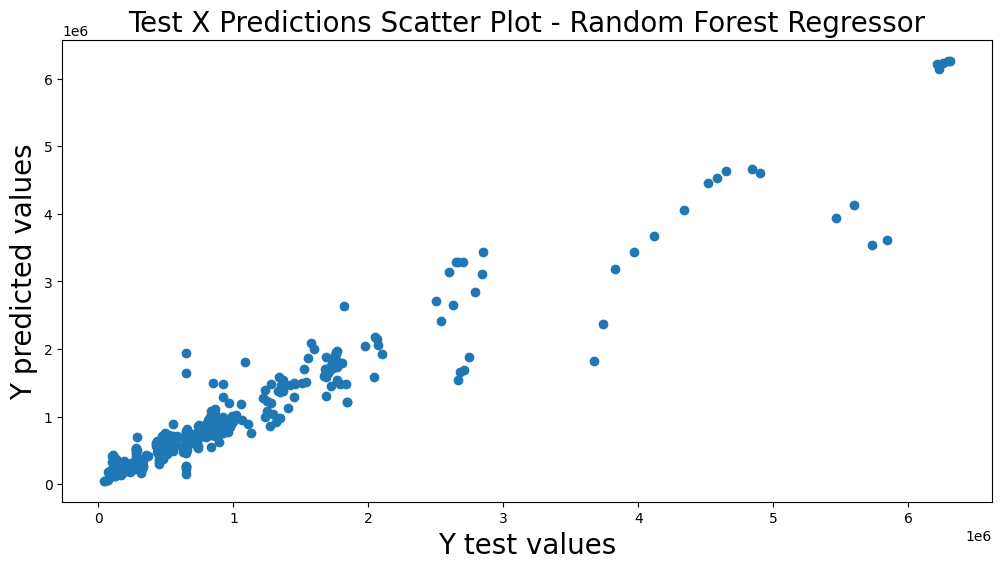

In [66]:
fig, ax = plt.subplots(figsize=(12,6)) 
plt.scatter(y_test, random_forest_predictions)
plt.xlabel("Y test values", fontsize=20)
plt.ylabel("Y predicted values", fontsize=20)
plt.title("Test X Predictions Scatter Plot - Random Forest Regressor", fontsize=20)

Text(0.5, 1.0, 'Residual Histogram - Random Forest Regressor')

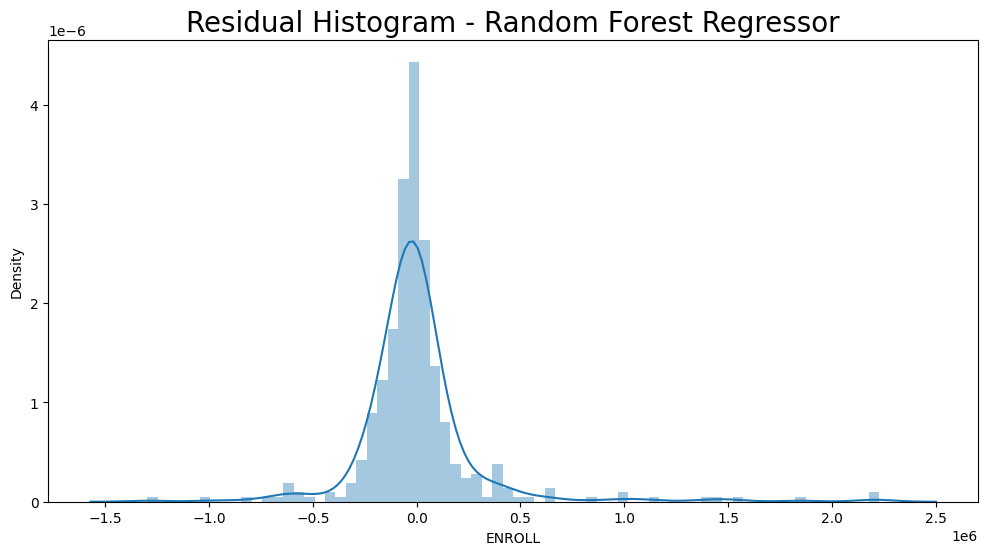

In [67]:
fig, ax = plt.subplots(figsize=(12,6)) 
sns.distplot((y_test-random_forest_predictions),bins=70)
plt.title("Residual Histogram - Random Forest Regressor", fontsize=20)

Now we can make a comparison between the metrics of all models

In [68]:
print('Metrics for Linear Regression:')
print(' ')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2_score', metrics.r2_score(y_test, predictions))
print(' ')
print('Metrics for Decision Tree Regressor:')
print(' ')
print('MAE:', metrics.mean_absolute_error(y_test, tree_reg_predictions))
print('MSE:', metrics.mean_squared_error(y_test, tree_reg_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tree_reg_predictions)))
print('r2_score', metrics.r2_score(y_test, tree_reg_predictions))
print(' ')
print('Metrics for Random Forest Regressor:')
print(' ')
print('MAE:', metrics.mean_absolute_error(y_test, random_forest_predictions))
print('MSE:', metrics.mean_squared_error(y_test, random_forest_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, random_forest_predictions)))
print('r2_score', metrics.r2_score(y_test, random_forest_predictions))


Metrics for Linear Regression:
 
MAE: 230744.320744479
MSE: 158649676012.92545
RMSE: 398308.51862962387
r2_score 0.8719501838436295
 
Metrics for Decision Tree Regressor:
 
MAE: 180461.88242280285
MSE: 146134708027.66925
RMSE: 382275.6963601914
r2_score 0.8820513034298073
 
Metrics for Random Forest Regressor:
 
MAE: 154112.81633016627
MSE: 93458226737.24664
RMSE: 305709.38280865154
r2_score 0.9245677075884491


The Random Forest Regressor have the best values for all the metrics studied

### Using "Shap" library to evaluate the features

In [69]:
explainer_forest = shap.Explainer(forest_reg.predict, X_test)

In [70]:
shap_values_forest = explainer_forest(X_test)

Exact explainer: 422it [01:47,  3.72it/s]                         


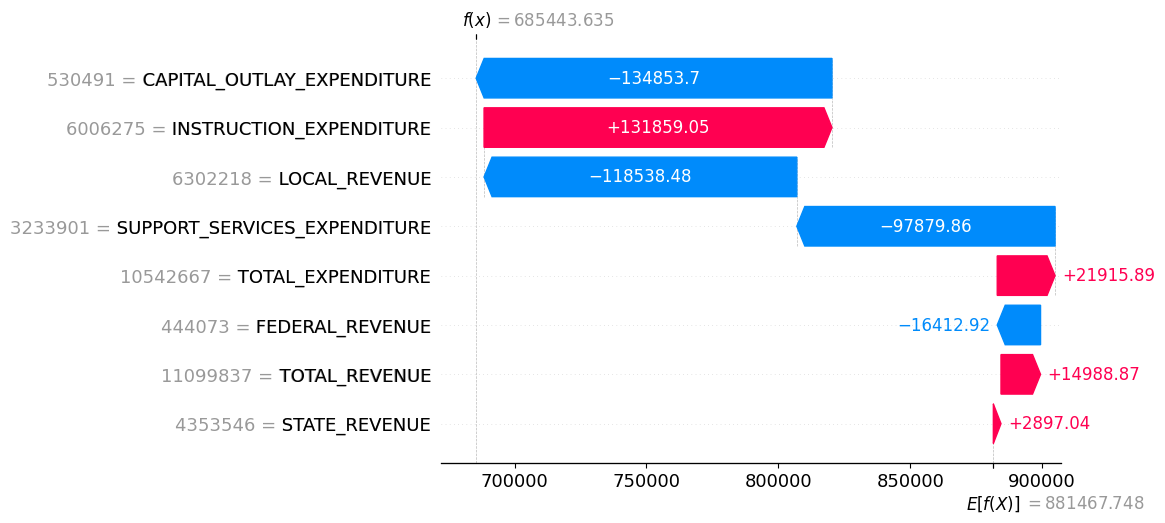

In [72]:
shap.plots.waterfall(shap_values_forest[0])

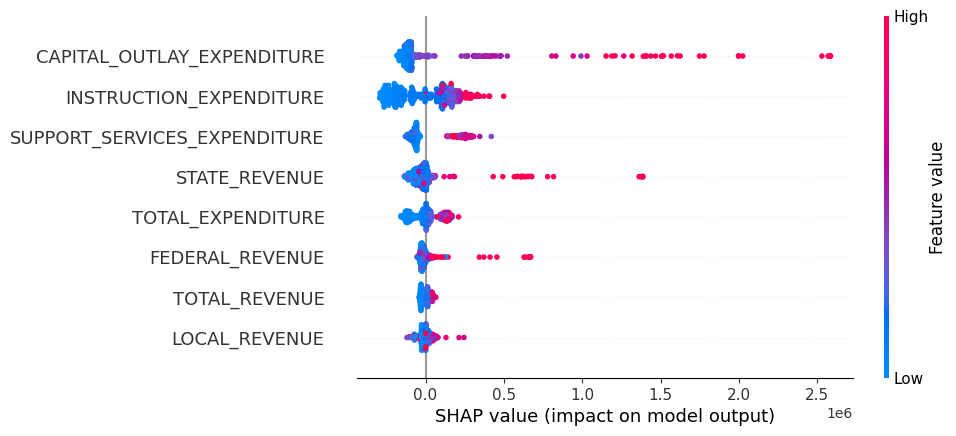

In [73]:
shap.plots.beeswarm(shap_values_forest)